In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import os

In [10]:
def get_e(board, i, j):
    l = int(board.shape[0])
    
    e = 0
    for k in [-1,1]:
        if board[(i + k)%l,(j)%l] == board[i,j]:
            e -= 1
        else:
            e += 1

    for k in [-1,1]:
        if board[(i)%l,(j+k)%l] == board[i,j]:
            e -= 1
        else:
            e += 1


    return e

In [11]:
def get_E(board):
    l = int(board.shape[0])

    E = 0 
    for i in range(l):
        for j in range(l):
            e = 0
            # neighbour below
            if board[(i + 1)%l,(j)%l] == board[i,j]:
                e -= 1
            else:
                e += 1
            
            #neighbour to the right
            if board[(i)%l,(j+1)%l] == board[i,j]:
                e -= 1
            else:
                e += 1
            
            E += e

    return E

In [12]:
def metropolis_step(board, beta, E, periodic=True):
    l = int(board.shape[0])

    if periodic:
        i1,j1 = np.random.randint(0,l), np.random.randint(0,l)
    else:
        i1,j1 = np.random.randint(0,l), np.random.randint(1,l-1)
    val1 = board[i1,j1]

    e = get_e(board, i1, j1)
    
    E_after = E - 2*e

    A=1
    if E < E_after:
        if beta != None:
            A=np.exp(-beta*(E_after-E))
        else:
            A=0

    take = np.random.random() < A
    if take:
        board[i1,j1] = -val1
        E = E_after

    return E


In [60]:
def metropolis_board(board, Tspace, periodic=True):
    current_board=board.copy()
    l = int(current_board.shape[0])

    E_all = []
    boards = []
    E = get_E(board)
    for j,T in enumerate(tqdm(list(Tspace))):

        beta = 1/T if T!=0 else None

        req = 125000
        Et = [None]*req

        # equilibrium with T
        E_min = E
        count=0
        while count < req:
            E = metropolis_step(current_board, beta, E, periodic)
            Et[count] = E
            count += 1
            if E < E_min:
                E_min = E
                count=0
        # # statistics
        # for i in range(int(50000)):
        #     E = metropolis_step(current_board, beta, E, periodic)
        #     Et += [E]

        if j%int(len(Tspace)/5) == 0:
            boards += [current_board.copy()]

        if j%int(len(Tspace)/15) == 0:
            print(f"status - spin up: {100*np.sum(current_board == 1)/l**2:.2f}%, spin down: {100*np.sum(current_board == -1)/l**2:.2f}%")

        # if j == len(Tspace)-1 and periodic:
        #     counter = 0
        #     while not np.all(current_board == 1) and not np.all(current_board == -1):
        #         if counter%20000==0:
        #             print(f"finalizing solution... spin up: {100*np.sum(current_board == 1)/l**2:.2f}%, spin down: {100*np.sum(current_board == -1)/l**2:.2f}%")
        #         metropolis_step(current_board, beta, E)
        #         Et += [E]

        #         counter += 1

        E_all += [Et]
        # df_T = pd.DataFrame({"E": Et})
        # df_T["T"] = T
        # dfs += [df_T]
    
    # df = pd.concat(dfs,ignore_index=True)
    E_arr = np.stack(E_all[::-1])
    return current_board, E_arr, boards

## Periodic

Init spin up: 0.50%, spin down: 0.50%


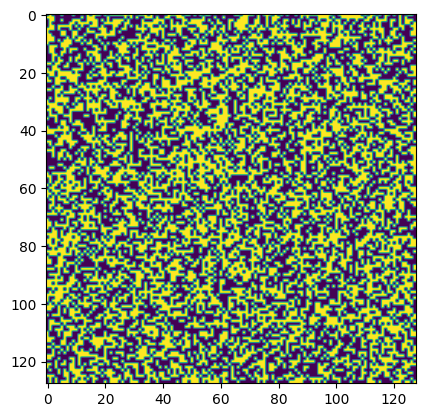

In [61]:
L=128
np.random.seed(42)
board = 2*np.random.randint(0,2,(L,L))-1
plt.imshow(board)
print(f"Init spin up: {np.sum(board == 1)/L**2:.2f}%, spin down: {np.sum(board == -1)/L**2:.2f}%")

In [62]:
Tspace = np.concatenate([np.arange(0.1,1.5,0.01),np.arange(1.5,3,0.0025),np.arange(3,4,0.01)])
# Tspace = np.arange(0.1,4,0.01)
Tspace = np.round(Tspace, 5)

In [63]:
np.random.seed(42)
new_board, data, boards = metropolis_board(board,Tspace[::-1],periodic=True)
# new_board, df = metropolis_board(board,np.arange(0.1,4,0.01)[::-1])

  0%|          | 0/840 [00:00<?, ?it/s]

  0%|          | 1/840 [00:03<50:53,  3.64s/it]

status - spin up: 49.15%, spin down: 50.85%


  7%|▋         | 57/840 [02:02<28:30,  2.18s/it]

status - spin up: 51.07%, spin down: 48.93%


 13%|█▎        | 113/840 [04:39<37:13,  3.07s/it]

status - spin up: 51.12%, spin down: 48.88%


 20%|██        | 169/840 [07:34<25:22,  2.27s/it]

status - spin up: 51.03%, spin down: 48.97%


 27%|██▋       | 225/840 [09:49<22:44,  2.22s/it]

status - spin up: 52.04%, spin down: 47.96%


 33%|███▎      | 281/840 [12:19<28:27,  3.05s/it]

status - spin up: 48.08%, spin down: 51.92%


 40%|████      | 337/840 [14:48<25:34,  3.05s/it]

status - spin up: 48.25%, spin down: 51.75%


 47%|████▋     | 393/840 [17:45<25:29,  3.42s/it]

status - spin up: 56.70%, spin down: 43.30%


 53%|█████▎    | 449/840 [20:23<16:12,  2.49s/it]

status - spin up: 75.16%, spin down: 24.84%


 60%|██████    | 505/840 [23:12<14:15,  2.56s/it]

status - spin up: 81.39%, spin down: 18.61%


 67%|██████▋   | 561/840 [26:12<17:24,  3.74s/it]

status - spin up: 82.97%, spin down: 17.03%


 73%|███████▎  | 617/840 [29:12<09:17,  2.50s/it]

status - spin up: 89.05%, spin down: 10.95%


 80%|████████  | 673/840 [31:43<09:04,  3.26s/it]

status - spin up: 99.05%, spin down: 0.95%


 87%|████████▋ | 729/840 [34:11<03:45,  2.03s/it]

status - spin up: 99.86%, spin down: 0.14%


 93%|█████████▎| 785/840 [36:13<01:32,  1.67s/it]

status - spin up: 100.00%, spin down: 0.00%


100%|██████████| 840/840 [37:41<00:00,  2.69s/it]


In [64]:
datetime_str = datetime.now().strftime(r"%d%m%y%H%M%S")
os.mkdir(f'results/{datetime_str}')
np.save(f'results/{datetime_str}/data', data)
np.save(f'results/{datetime_str}/board_init',board)
np.save(f'results/{datetime_str}/board',new_board)
np.save(f'results/{datetime_str}/Tspace',Tspace)
for i,board_i in enumerate(boards):
    np.save(f'results/{datetime_str}/board{i}',board_i)

# path = f'results/230324132113'
# df = pd.read_csv(f'{path}/data')
# board = np.load(f'{path}/board.npy')
# Tspace = np.load(f'{path}/Tspace.npy')

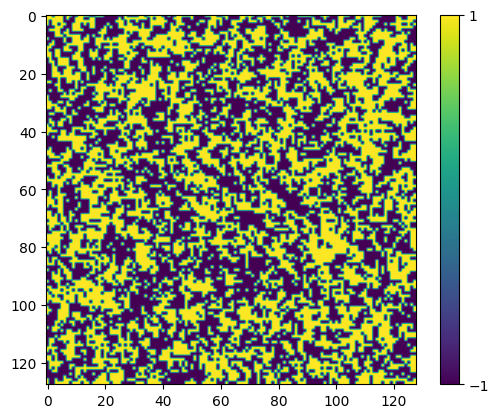

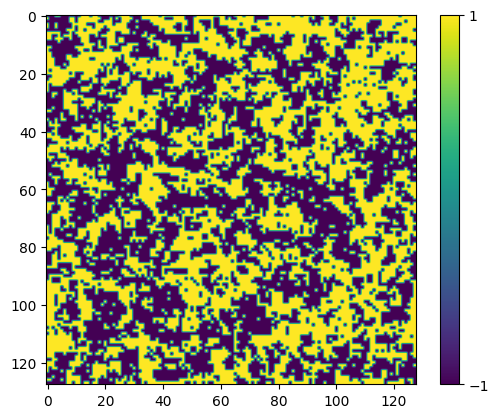

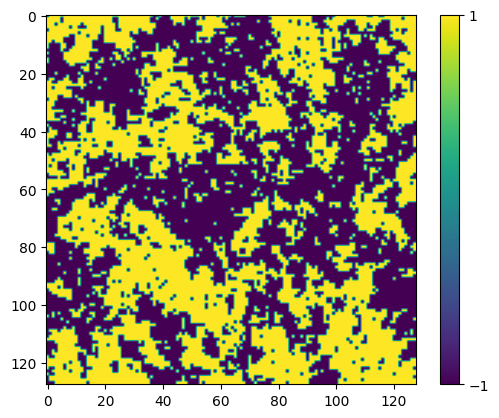

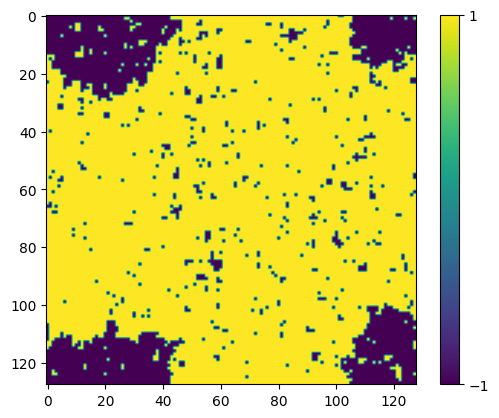

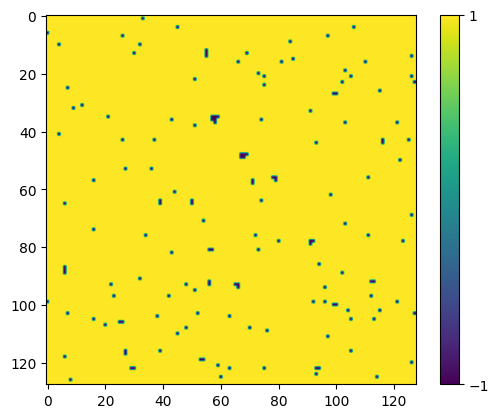

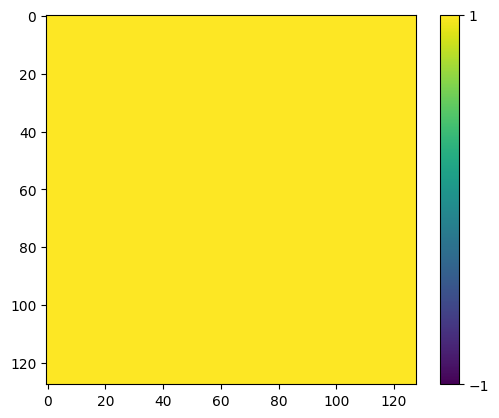

In [65]:
for board in boards:
    plt.figure()
    plt.imshow(board,vmin=-1,vmax=1)
    cbar = plt.colorbar(ticks=[-1,1])

plt.figure()
plt.imshow(new_board,vmin=-1,vmax=1)
cbar = plt.colorbar(ticks=[-1,1])

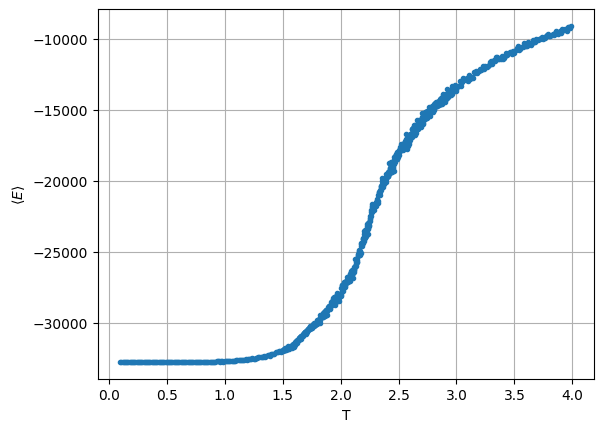

In [66]:
Emean = np.mean(data, 1)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left<E\right>$')
plt.plot(Tspace, Emean, '.')

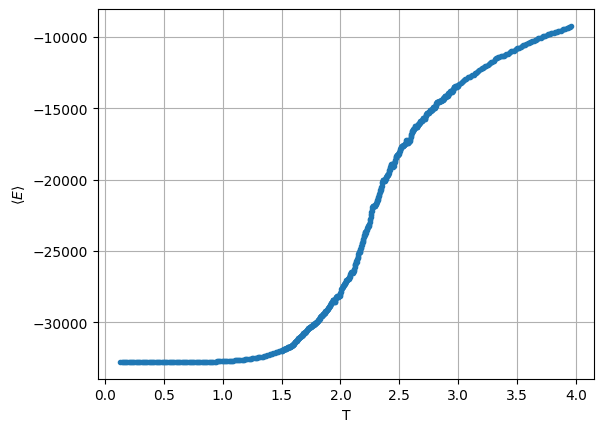

In [69]:
Emean = np.mean(data, 1)
Emean_smooth = np.convolve(Emean, 1/7 * np.ones(7), 'valid')
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left<E\right>$')
plt.plot(Tspace[3:-3], Emean_smooth, '.')


Text(0, 0.5, '$C_v$')

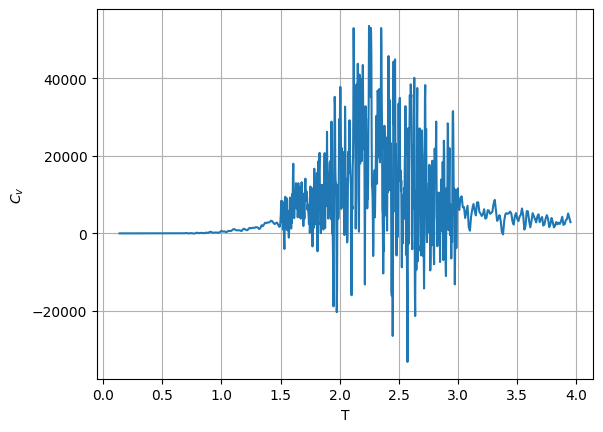

In [70]:
Emean = np.mean(data,1)
Emean=Emean.reshape((len(Emean)))
Emean_smooth = np.convolve(Emean, 1/7 * np.ones(7),'valid')
Tred = Tspace[3:-3]
dE = ((Emean_smooth[2:]-Emean_smooth[:-2])/(Tred[2:]-Tred[:-2]))
plt.plot((Tred[2:] + Tred[:-2])/2, dE)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$C_v$')

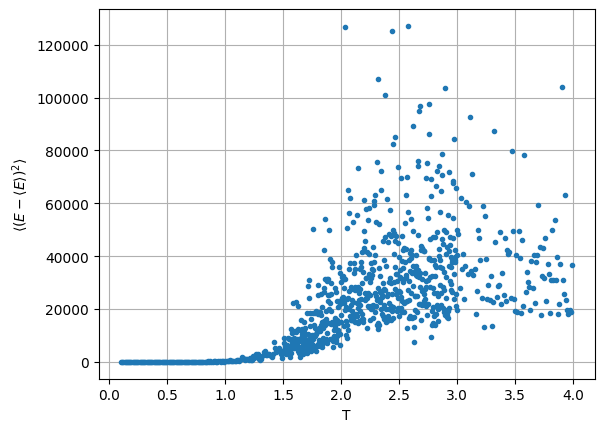

In [71]:
Evar = np.var(data,1)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left< \left( E-\left< E \right> \right) ^2 \right>$')
plt.plot(Tspace, Evar, '.')
# plt.yscale('log')

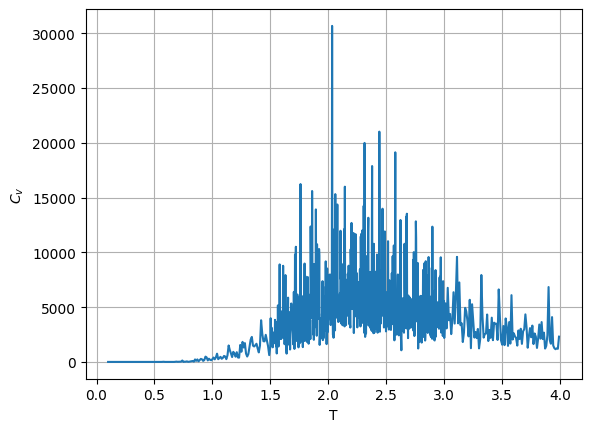

In [72]:
Cv = np.var(data,1)/(Tspace**2)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$C_v$')
# plt.yscale('log')
plt.plot(Tspace, Cv)

Text(0.5, 0, 'T')

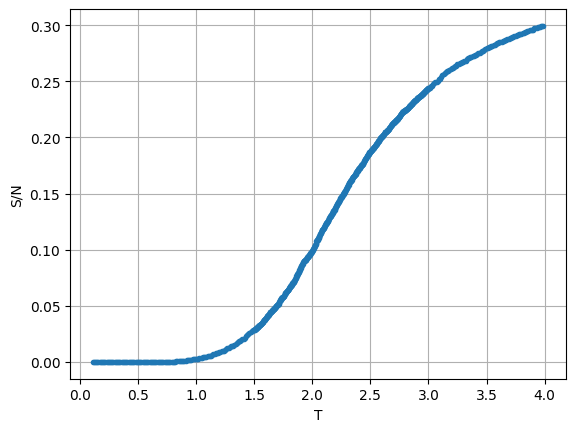

In [73]:
S = (np.log(2) + np.cumsum((Cv[:-1] / Tspace[:-1])* (Tspace[1:] - Tspace[:-1]))) / L**2
plt.plot(Tspace[1:], S, '.')
plt.grid()
plt.ylabel('S/N')
plt.xlabel('T')

Text(0.5, 0, 'T')

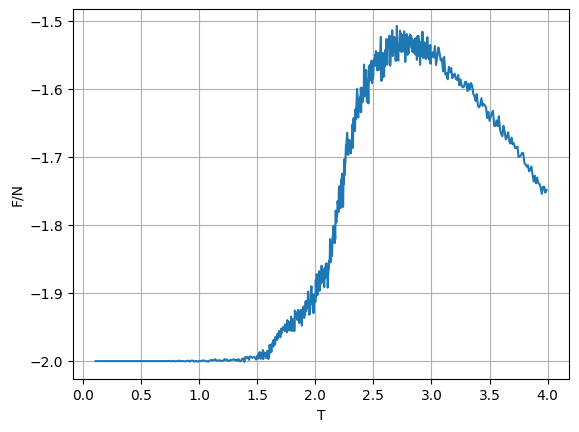

In [75]:
F = Emean[1:]/L**2 - Tspace[1:] * (S)
plt.plot(Tspace[1:], F, '-', markersize=2)
plt.grid()
plt.ylabel('F/N')
plt.xlabel('T')

## Constant Walls

Init spin up: 0.50%, spin down: 0.50%


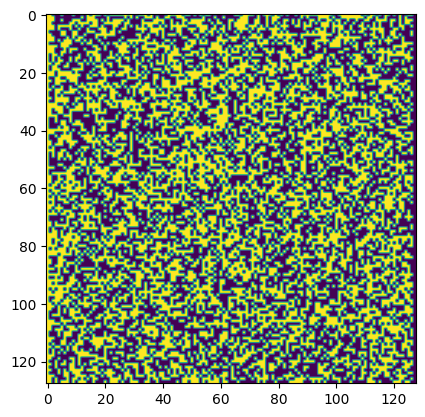

In [90]:
L=128
np.random.seed(42)
board = 2*np.random.randint(0,2,(L,L))-1
board[:,0]=1
board[:,-1]=-1
plt.imshow(board)
print(f"Init spin up: {np.sum(board == 1)/L**2:.2f}%, spin down: {np.sum(board == -1)/L**2:.2f}%")

In [91]:
Tspace = np.concatenate([np.arange(0.1,1.5,0.01),np.arange(1.5,3,0.0025),np.arange(3,4,0.01)])
# Tspace = np.arange(0.1,4,0.1)[::-1]
Tspace = np.round(Tspace, 5)

In [92]:
np.random.seed(42)
new_board, data, boards = metropolis_board(board,Tspace[::-1],periodic=False)
# new_board, df = metropolis_board(board,np.arange(0.1,4,0.01)[::-1])

  0%|          | 1/840 [00:01<26:21,  1.88s/it]

status - spin up: 51.31%, spin down: 48.69%


  7%|▋         | 57/840 [02:09<30:25,  2.33s/it]

status - spin up: 49.10%, spin down: 50.90%


 13%|█▎        | 113/840 [04:25<23:08,  1.91s/it]

status - spin up: 51.95%, spin down: 48.05%


 20%|██        | 169/840 [06:44<28:07,  2.51s/it]

status - spin up: 48.91%, spin down: 51.09%


 27%|██▋       | 225/840 [08:46<23:03,  2.25s/it]

status - spin up: 47.48%, spin down: 52.52%


 33%|███▎      | 281/840 [11:01<21:48,  2.34s/it]

status - spin up: 48.11%, spin down: 51.89%


 40%|████      | 337/840 [13:31<20:15,  2.42s/it]

status - spin up: 45.14%, spin down: 54.86%


 47%|████▋     | 393/840 [15:40<17:24,  2.34s/it]

status - spin up: 53.32%, spin down: 46.68%


 53%|█████▎    | 449/840 [18:07<19:31,  3.00s/it]

status - spin up: 56.59%, spin down: 43.41%


 60%|██████    | 505/840 [20:29<11:39,  2.09s/it]

status - spin up: 61.94%, spin down: 38.06%


 67%|██████▋   | 561/840 [22:52<12:35,  2.71s/it]

status - spin up: 66.47%, spin down: 33.53%


 73%|███████▎  | 617/840 [25:20<11:11,  3.01s/it]

status - spin up: 70.39%, spin down: 29.61%


 80%|████████  | 673/840 [27:36<07:12,  2.59s/it]

status - spin up: 70.31%, spin down: 29.69%


 87%|████████▋ | 729/840 [29:46<04:26,  2.40s/it]

status - spin up: 73.05%, spin down: 26.95%


 93%|█████████▎| 785/840 [31:53<01:41,  1.84s/it]

status - spin up: 73.74%, spin down: 26.26%


100%|██████████| 840/840 [33:08<00:00,  2.37s/it]


In [93]:
datetime_str = datetime.now().strftime(r"%d%m%y%H%M%S")
os.mkdir(f'results/{datetime_str}')
np.save(f'results/{datetime_str}/data', data)
np.save(f'results/{datetime_str}/board_init',board)
np.save(f'results/{datetime_str}/board',new_board)
np.save(f'results/{datetime_str}/Tspace',Tspace)
for i,board_i in enumerate(boards):
    np.save(f'results/{datetime_str}/board{i}',board_i)

# path = f'results/230324132113'
# df = pd.read_csv(f'{path}/data')
# board = np.load(f'{path}/board.npy')
# Tspace = np.load(f'{path}/Tspace.npy')

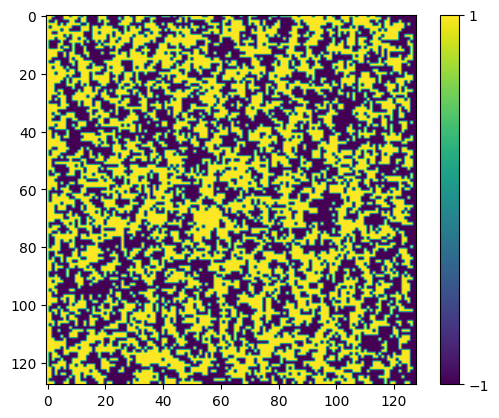

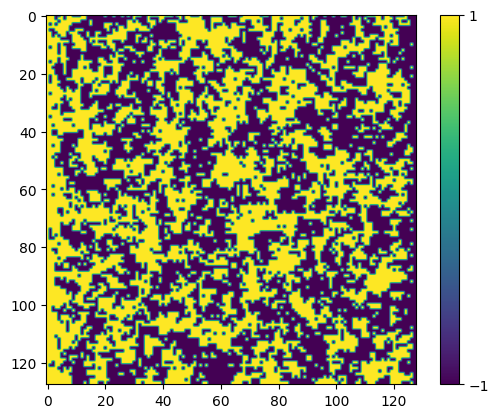

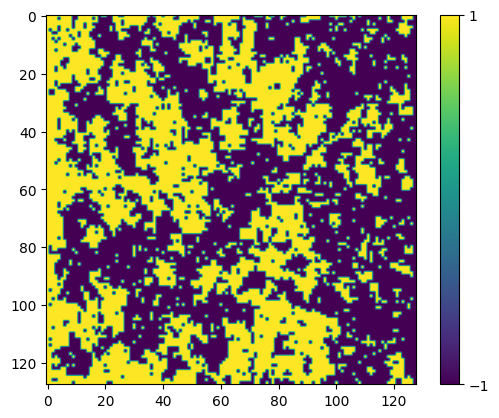

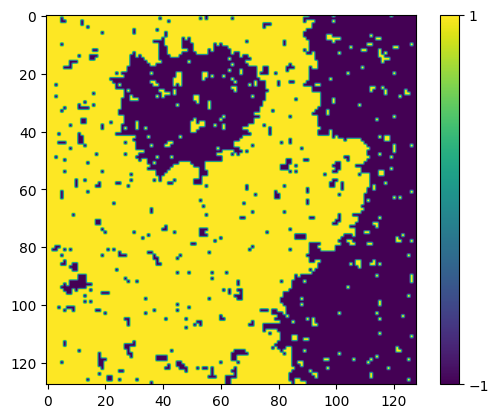

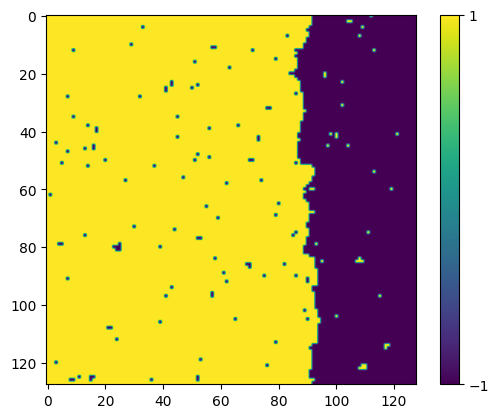

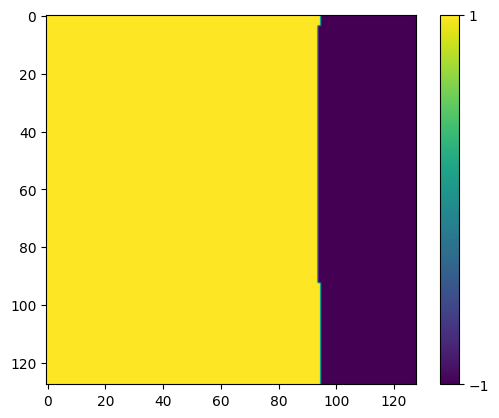

In [94]:
for board in boards:
    plt.figure()
    plt.imshow(board,vmin=-1,vmax=1)
    cbar = plt.colorbar(ticks=[-1,1])

plt.figure()
plt.imshow(new_board,vmin=-1,vmax=1)
cbar = plt.colorbar(ticks=[-1,1])

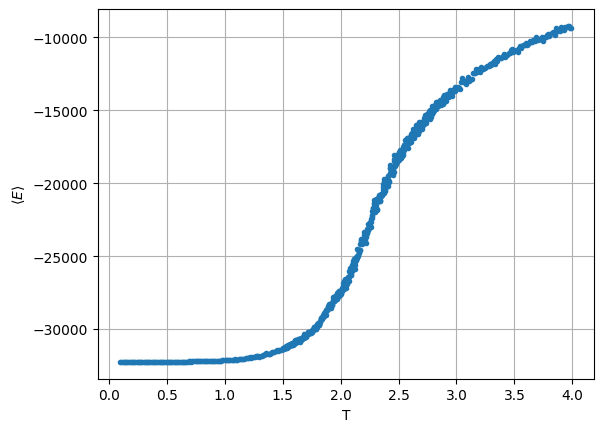

In [95]:
Emean = np.mean(data, 1)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left<E\right>$')
plt.plot(Tspace, Emean, '.')

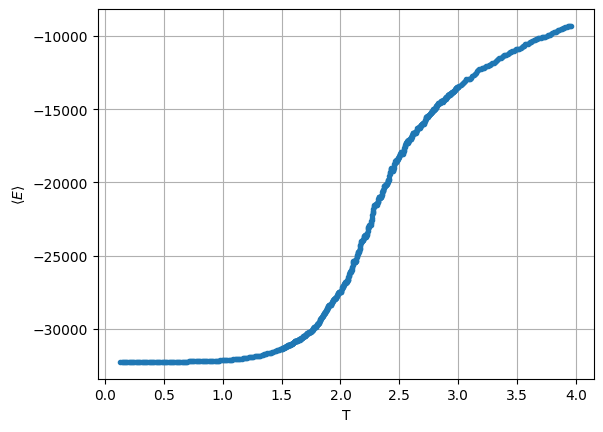

In [96]:
Emean = np.mean(data, 1)
Emean_smooth = np.convolve(Emean, 1/7 * np.ones(7), 'valid')
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left<E\right>$')
plt.plot(Tspace[3:-3], Emean_smooth, '.')


Text(0, 0.5, '$C_v$')

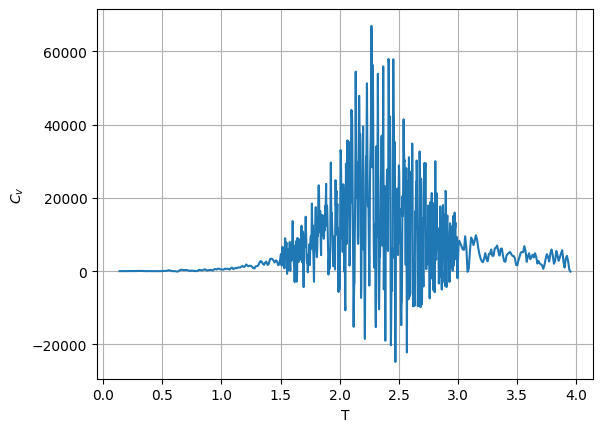

In [97]:
Emean = np.mean(data,1)
Emean=Emean.reshape((len(Emean)))
Emean_smooth = np.convolve(Emean, 1/7 * np.ones(7),'valid')
Tred = Tspace[3:-3]
dE = ((Emean_smooth[2:]-Emean_smooth[:-2])/(Tred[2:]-Tred[:-2]))
plt.plot((Tred[2:] + Tred[:-2])/2, dE)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$C_v$')

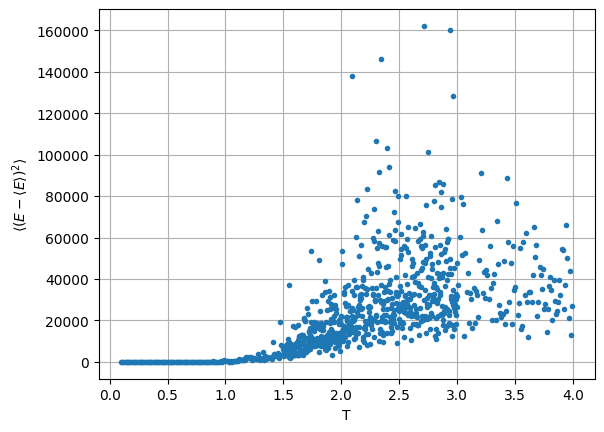

In [98]:
Evar = np.var(data,1)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$\left< \left( E-\left< E \right> \right) ^2 \right>$')
plt.plot(Tspace, Evar, '.')
# plt.yscale('log')

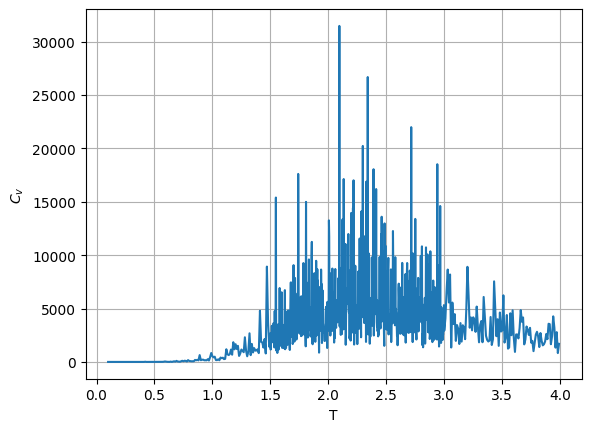

In [99]:
Cv = np.var(data,1)/(Tspace**2)
plt.grid()
plt.xlabel('T')
plt.ylabel(r'$C_v$')
# plt.yscale('log')
plt.plot(Tspace, Cv)

Text(0.5, 0, 'T')

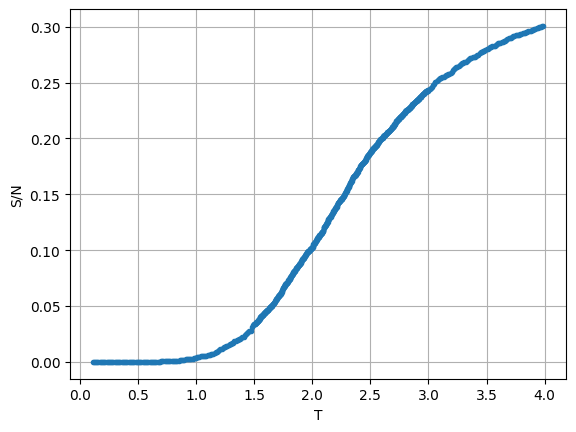

In [100]:
S = (np.log(2) + np.cumsum((Cv[:-1] / Tspace[:-1])* (Tspace[1:] - Tspace[:-1]))) / L**2
plt.plot(Tspace[1:], S, '.')
plt.grid()
plt.ylabel('S/N')
plt.xlabel('T')

Text(0.5, 0, 'T')

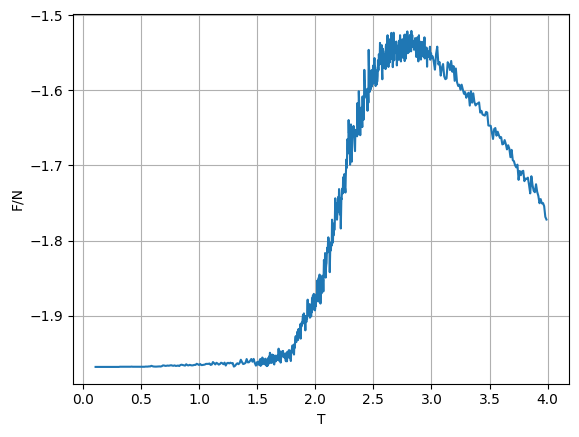

In [101]:
F = Emean[1:]/L**2 - Tspace[1:] * (S)
plt.plot(Tspace[1:], F, '-', markersize=2)
plt.grid()
plt.ylabel('F/N')
plt.xlabel('T')

## Final Plots

In [132]:
from scipy.integrate import cumtrapz

In [108]:
periodic='250324153635'
edge='250324171636'

data_periodic = np.load(f'results/{periodic}/data.npy')
data_edge = np.load(f'results/{edge}/data.npy')

In [251]:
Cv_periodic = np.var(data_periodic,1)/(Tspace**2)
S_periodic = (cumtrapz(Cv_periodic/Tspace, Tspace, initial=np.log(2))) / L**2
# S_periodic = (np.log(2) + np.cumsum((Cv_periodic[:-1] / Tspace[:-1])* (Tspace[1:] - Tspace[:-1]))) / L**2
F_periodic = np.mean(data_periodic,1)/L**2 - Tspace * (S_periodic)

In [257]:
Cv_edge = np.var(data_edge,1)/(Tspace**2)
S_edge = (cumtrapz((Cv_edge/Tspace), Tspace, initial=np.log(2*L)) / L**2)
F_edge = np.mean(data_edge,1)/L**2 - Tspace * (S_edge)

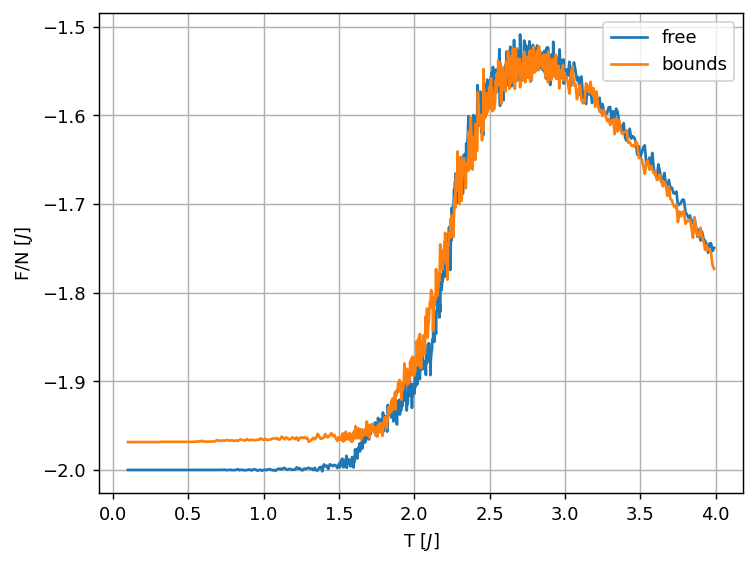

In [279]:
plt.figure(dpi=130)
plt.plot(Tspace, F_periodic, '-', label='free')
plt.plot(Tspace, F_edge, '-', label='bounds')
plt.grid()
plt.plot()
plt.ylabel(r'F/N $\left[ J \right]$')
plt.xlabel(r'T $\left[ J \right]$')
plt.legend()
plt.show()

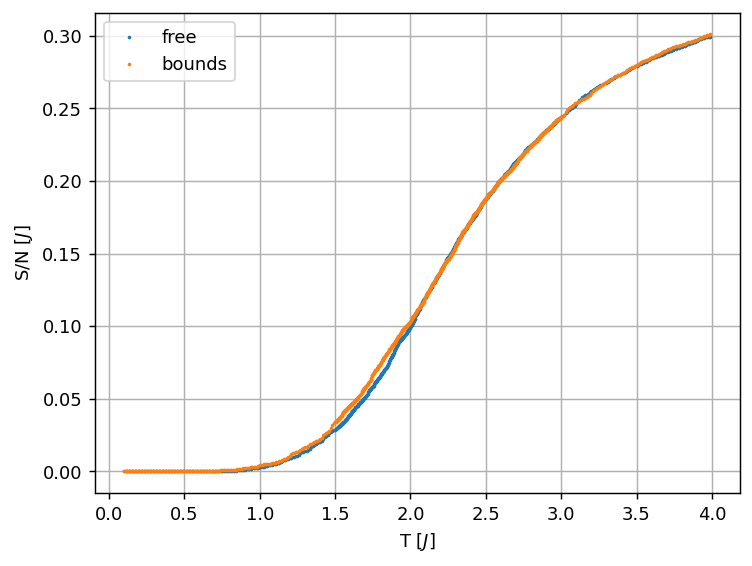

In [281]:
plt.figure(dpi=130)
plt.plot(Tspace, S_periodic, '.', label='free',markersize=2)
plt.plot(Tspace, S_edge, '.', label='bounds',markersize=2)
plt.grid()
plt.plot()
plt.ylabel(r'S/N $\left[ J \right]$')
plt.xlabel(r'T $\left[ J \right]$')
plt.legend()
plt.show()

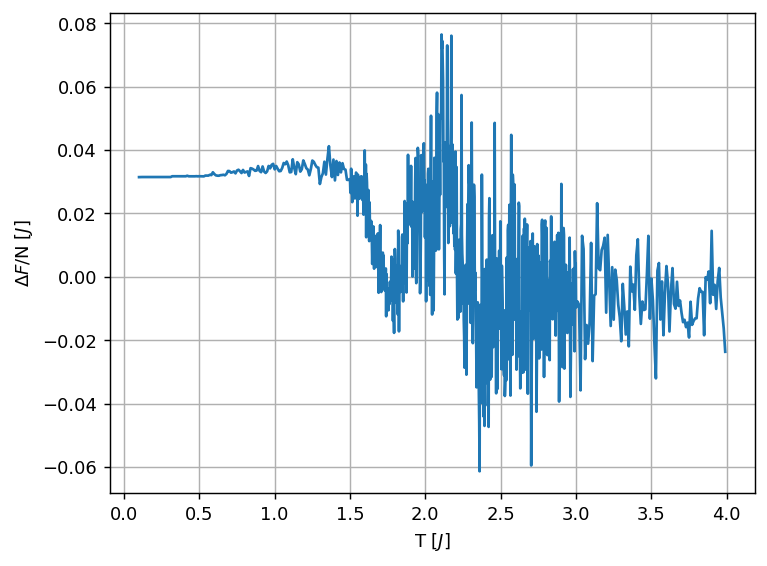

In [282]:
plt.figure(dpi=130)
plt.plot(Tspace, F_edge-F_periodic, '-')
plt.grid()
plt.plot()
plt.ylabel(r'$\Delta F$/N $\left[ J \right]$')
plt.xlabel(r'T $\left[ J \right]$')
plt.show()

In [261]:
print((F_edge-F_periodic)[0] * L**2)
print(np.mean((F_edge-F_periodic)[-20:]) * L**2)

515.5147969736099
-97.43078522064643


In [278]:
print((Tspace*(S_edge-S_periodic) * L**2)[-1])

92.4129547675573
3.99


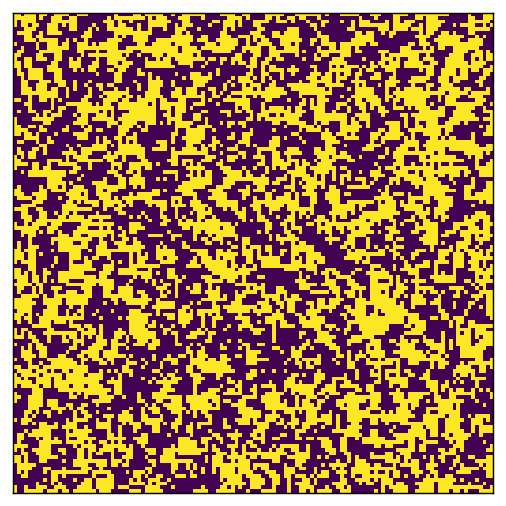

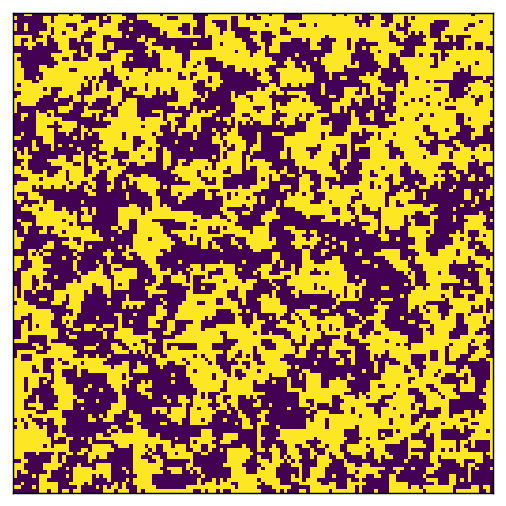

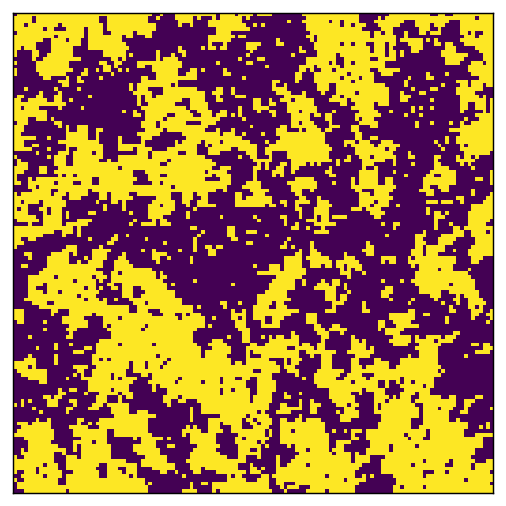

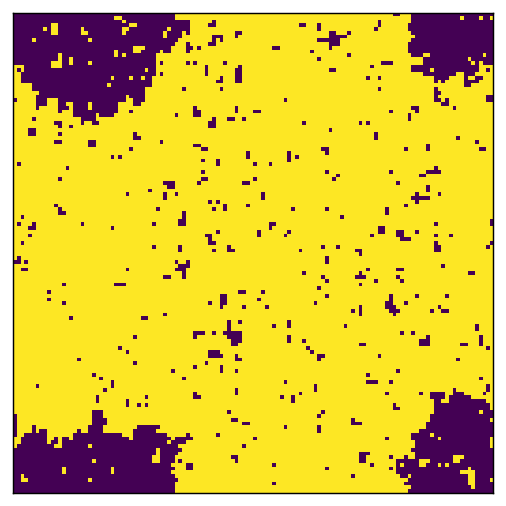

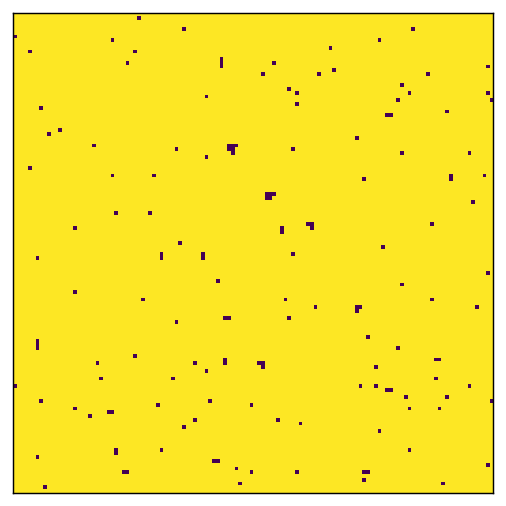

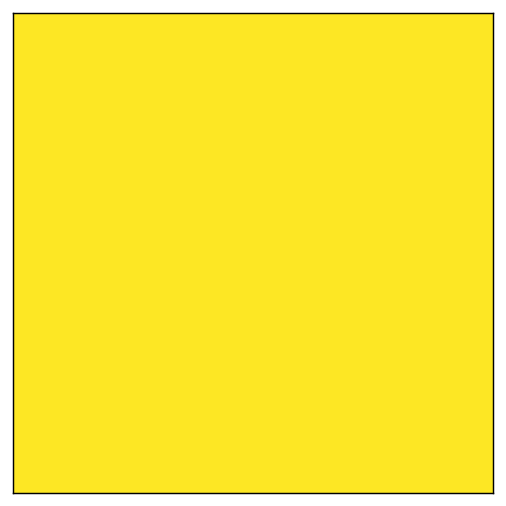

In [272]:
for i in range(5):
    boardi = np.load(f'results/{periodic}/board{i}.npy')
    plt.figure(dpi=130)
    plt.imshow(boardi,vmin=-1,vmax=1)
    plt.xticks([])
    plt.yticks([])
    # cbar = plt.colorbar(ticks=[-1,1])
    plt.savefig(f'plots/periodic_board{i}.png',bbox_inches='tight')
    plt.show()
board_end = np.load(f'results/{periodic}/board.npy')
plt.figure(dpi=130)
plt.imshow(board_end,vmin=-1,vmax=1)
# cbar = plt.colorbar(ticks=[-1,1])
plt.xticks([])
plt.yticks([])
plt.savefig(f'plots/periodic_board_end.png',bbox_inches='tight')
plt.show()

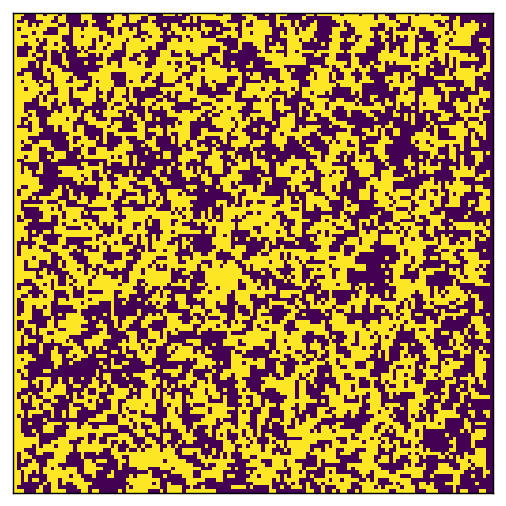

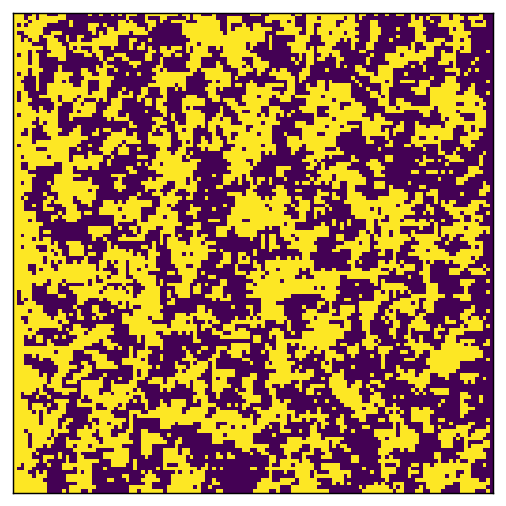

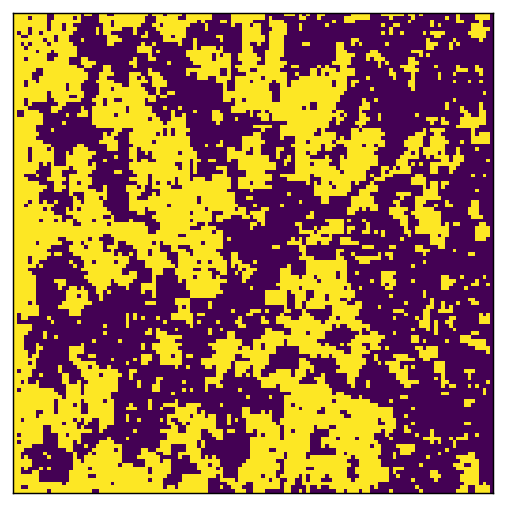

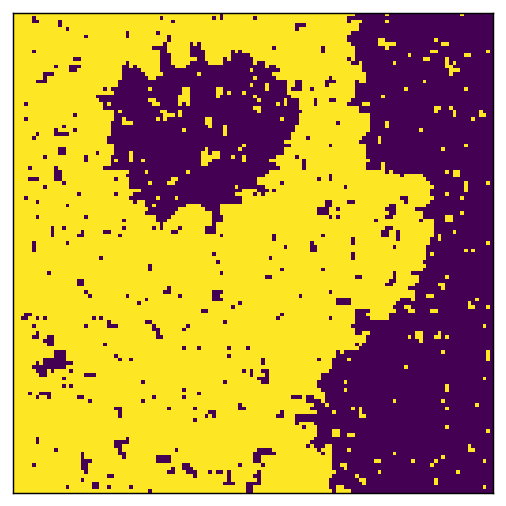

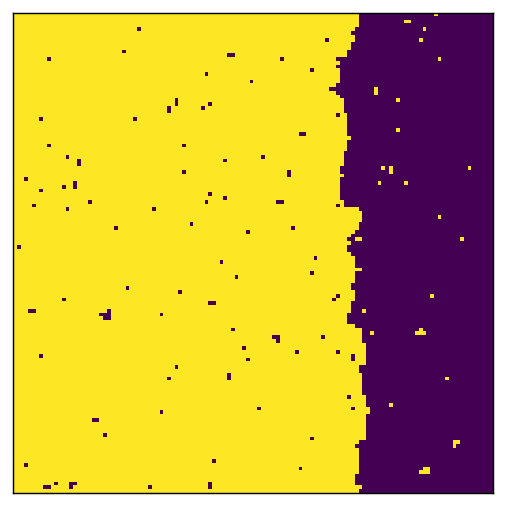

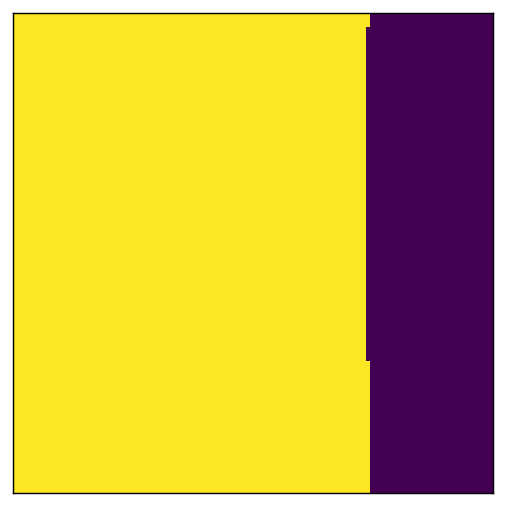

In [273]:
for i in range(5):
    boardi = np.load(f'results/{edge}/board{i}.npy')
    plt.figure(dpi=130)
    plt.imshow(boardi,vmin=-1,vmax=1)
    plt.xticks([])
    plt.yticks([])
    # cbar = plt.colorbar(ticks=[-1,1])
    plt.savefig(f'plots/edge_board{i}.png',bbox_inches='tight')
    plt.show()
board_end = np.load(f'results/{edge}/board.npy')
plt.figure(dpi=130)
plt.imshow(board_end,vmin=-1,vmax=1)
# cbar = plt.colorbar(ticks=[-1,1])
plt.xticks([])
plt.yticks([])
plt.savefig(f'plots/edge_board_end.png',bbox_inches='tight')
plt.show()

In [285]:
a=int(len(Tspace)/5)
print(Tspace[-1],Tspace[-1-a],Tspace[-1-2*a],Tspace[-1-3*a],Tspace[-1-4*a],Tspace[0])

3.99 2.8275 2.4075 1.9875 1.5675 0.1
